In [64]:
# Importamos las librerías necesarias para análisis de datos, visualización y machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [65]:
# Cargamos el dataset
df = pd.read_csv('car dataset.csv')

# Mostramos las primeras filas para entender la estructura del dataset
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [66]:
# Información general del dataset
df.info()

# Estadísticas descriptivas para las columnas numéricas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [67]:
# Revisamos si hay valores nulos
df.isnull().sum()


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

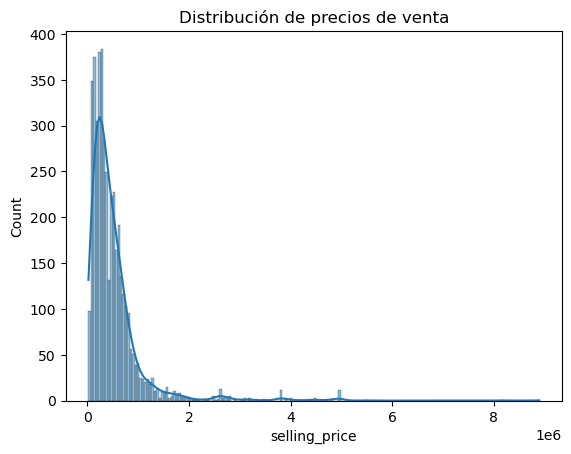

In [68]:
# Distribución del precio de venta
sns.histplot(df['selling_price'], kde=True)
plt.title('Distribución de precios de venta')
plt.show()


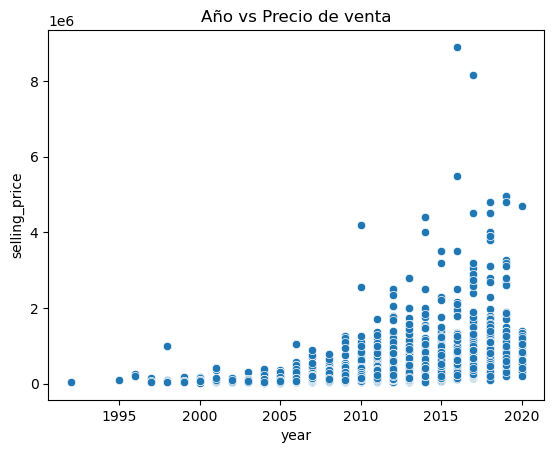

In [69]:
# Relación entre el año del auto y el precio
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Año vs Precio de venta')
plt.show()


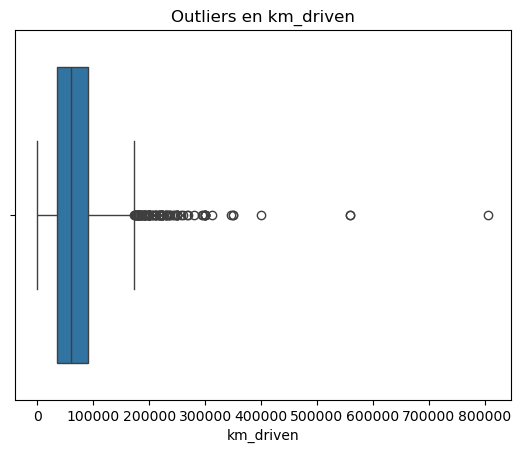

In [70]:
# Revisamos si hay outliers en km_driven
sns.boxplot(x=df['km_driven'])
plt.title('Outliers en km_driven')
plt.show()


In [71]:
# Convertimos la columna "year" en la edad del vehículo
df['car_age'] = 2025 - df['year']

# Eliminamos columnas que no aportan al modelo o que son difíciles de codificar (como el nombre)
df = df.drop(['name', 'year'], axis=1)

In [72]:
# Convertimos variables categóricas en variables numéricas
le = LabelEncoder()
df['fuel'] = le.fit_transform(df['fuel'])
df['seller_type'] = le.fit_transform(df['seller_type'])
df['transmission'] = le.fit_transform(df['transmission'])
df['owner'] = le.fit_transform(df['owner'])


In [73]:
# Revisión final del dataset limpio
df.head()


,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,60000,70000,4,1,1,0,18
1,135000,50000,4,1,1,0,18
2,600000,100000,1,1,1,0,13
3,250000,46000,4,1,1,0,8
4,450000,141000,1,1,1,2,11


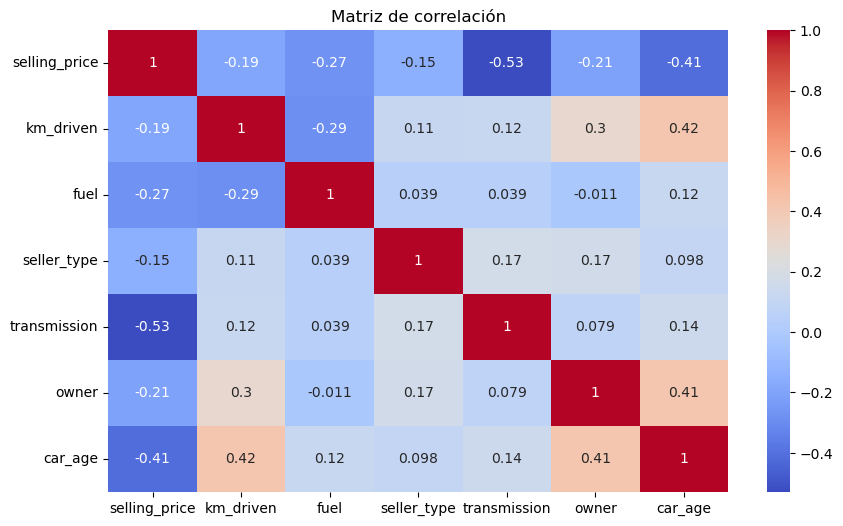

In [74]:
# Correlación entre las variables
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


In [75]:
# Seleccionamos variables más relevantes (todas menos el precio serán independientes)
X = df.drop('selling_price', axis=1)
y = df['selling_price']


In [76]:
# Dividimos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
# Creamos y entrenamos el modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [78]:
# Realizamos predicciones sobre el set de prueba
y_pred = model.predict(X_test)

# Evaluamos con métricas regresivas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Error Cuadrático Medio (MSE): 184963450105.74
R² Score: 0.39


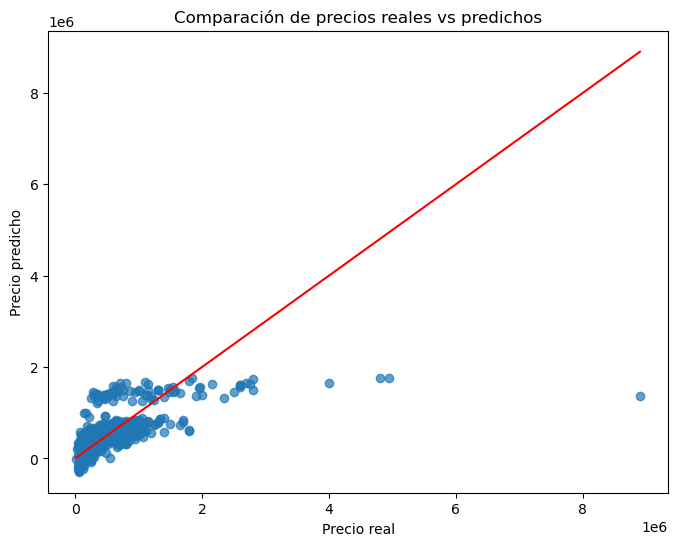

In [79]:
# Comparación entre los precios reales y los predichos
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Comparación de precios reales vs predichos")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # línea ideal
plt.show()


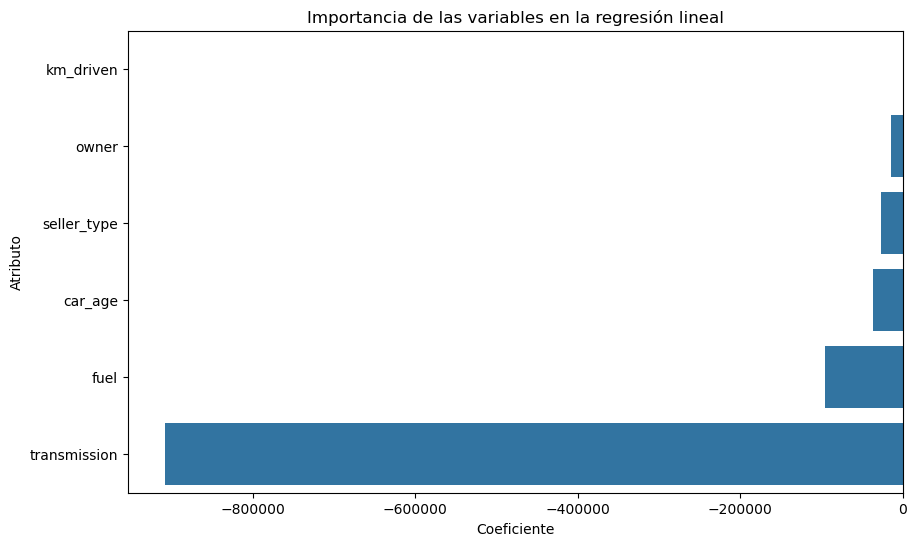

In [80]:
# Importancia de las variables (coeficientes del modelo)
coeficientes = pd.DataFrame({
    'Atributo': X.columns,
    'Coeficiente': model.coef_
})

coeficientes.sort_values(by='Coeficiente', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(x='Coeficiente', y='Atributo', data=coeficientes)
plt.title('Importancia de las variables en la regresión lineal')
plt.show()
